**кластеризатор КНП**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
# import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

---

In [2]:
X = np.loadtxt('../data/360_1/points_1.txt')

n_fet = X.shape[1] # размерность пространства
n_ex = X.shape[0] # количество точек

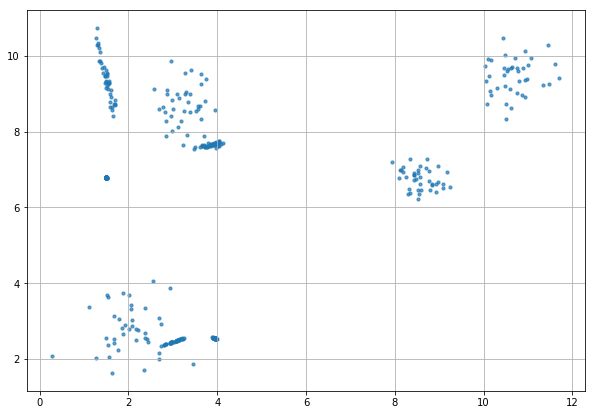

In [3]:
plt.figure(figsize=(10,7))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()
plt.show()

---

In [4]:
r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)

In [5]:
# исключаем из поиска (маскируем) нулевую главную диагональ
rmask = np.zeros(r.shape)
rmask[ np.diag_indices(rmask.shape[0]) ] = np.inf

# пара точек и с наименьшим расстоянием
pair = np.unravel_index((r+rmask).argmin(), r.shape)
edge = [ pair ] 
dist = [ r[pair] ]

In [6]:
for i in range(r.shape[0]-2):
    # номера связанных вершин
    idx_node = set(sum(edge,()))
    # номера несвязанных вершин
    idx_node_nl = tuple(set(range(r.shape[0]))-idx_node)
    idx_node = tuple(idx_node) 
    
    rmask = np.zeros(r.shape)
    # исключаем из поиска (маскируем) главную диагональ
    rmask[ np.diag_indices(rmask.shape[0]) ] = np.inf
    # исключаем (маскируем) столбцы связанных точек
    rmask[:,idx_node] = np.inf
    # исключаем (маскируем) строки несвязанных точек
    rmask[idx_node_nl,:] = np.inf

    # номера точек связаной и несвязанной с наименьшим расстоянием
    pair = np.unravel_index((r+rmask).argmin(), r.shape)
    edge.append(pair)
    dist.append(r[pair])

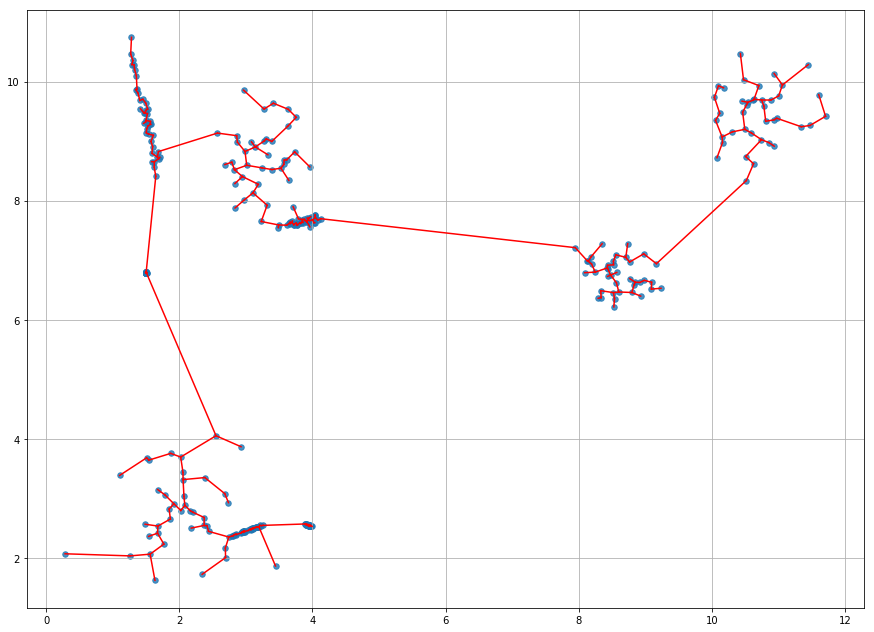

In [9]:
# рисуем полный граф
edge_points = [ [ [ X[n1,0],X[n2,0] ], [ X[n1,1],X[n2,1] ] ] for n1,n2 in edge ]

plt.figure(figsize=(15,11))
plt.scatter( x=X[:,0], y=X[:,1], s=30, alpha=0.8 )
for p in edge_points: plt.plot( p[0], p[1], c='r' )
plt.grid()
plt.show()

In [7]:
k=3 #  удаляем k самых длинных ребер
idx_pair = np.argsort(dist)[::-1] # номера ребер в порядке убывания длинны
edge_split = [ edge[i] for i in idx_pair[k:] ] # обрезаный список ребер

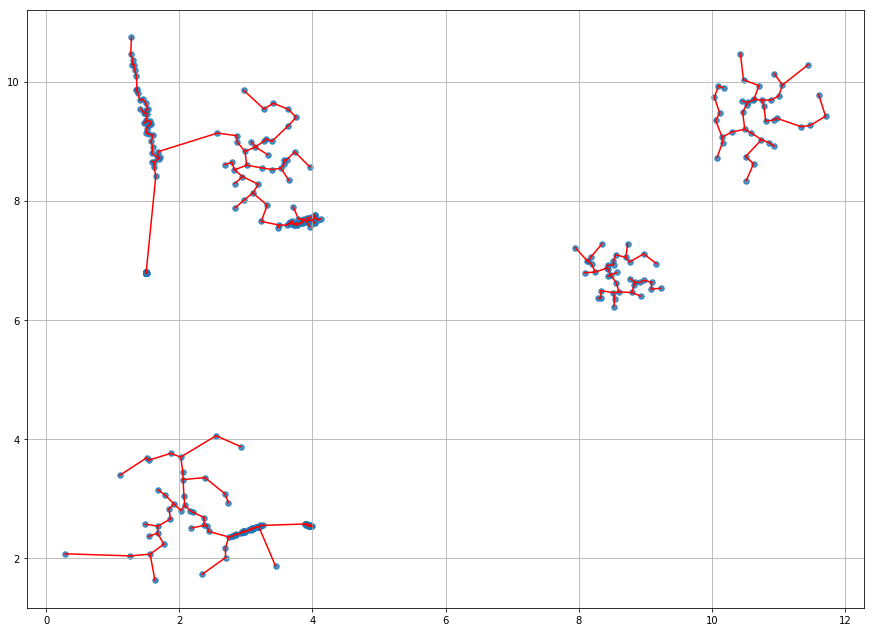

In [8]:
# рисуем разделённый граф
edge_points = [ [ [ X[n1,0],X[n2,0] ], [ X[n1,1],X[n2,1] ] ] for n1,n2 in edge_split ]
plt.figure(figsize=(15,11))
plt.scatter( x=X[:,0], y=X[:,1], s=30, alpha=0.8 )
for p in edge_points: plt.plot( p[0], p[1], c='r' )
plt.grid()
plt.show()

In [10]:
edge

[(205, 226),
 (226, 221),
 (221, 208),
 (221, 228),
 (228, 222),
 (222, 202),
 (208, 204),
 (204, 215),
 (215, 216),
 (216, 230),
 (215, 212),
 (212, 214),
 (214, 235),
 (235, 238),
 (238, 206),
 (205, 223),
 (223, 225),
 (225, 219),
 (219, 236),
 (236, 209),
 (206, 231),
 (231, 237),
 (228, 217),
 (217, 234),
 (234, 224),
 (224, 239),
 (239, 210),
 (210, 201),
 (210, 200),
 (217, 233),
 (233, 227),
 (209, 213),
 (213, 207),
 (206, 229),
 (229, 232),
 (229, 220),
 (232, 218),
 (218, 211),
 (230, 203),
 (203, 339),
 (339, 345),
 (345, 336),
 (336, 333),
 (336, 340),
 (340, 273),
 (340, 351),
 (351, 348),
 (351, 334),
 (334, 350),
 (350, 331),
 (331, 341),
 (341, 324),
 (324, 338),
 (338, 355),
 (355, 323),
 (323, 358),
 (358, 346),
 (346, 322),
 (322, 352),
 (352, 335),
 (335, 353),
 (352, 354),
 (354, 344),
 (344, 349),
 (344, 325),
 (325, 330),
 (349, 337),
 (330, 328),
 (328, 342),
 (342, 357),
 (357, 327),
 (327, 326),
 (326, 332),
 (332, 356),
 (356, 343),
 (343, 329),
 (329, 320),